# Assignment 2 - Data Science in Finance and Insurance
Submission by: Dennis Goldenberg

In [38]:
#import statements
import matplotlib.pyplot as plt;
import pandas as pd;
from plotnine import *;
import patchworklib as pw;

In [4]:
#Read in Data
data = pd.read_csv("anscombe.csv")
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


## Part [a] - Plotting with Matplotlib

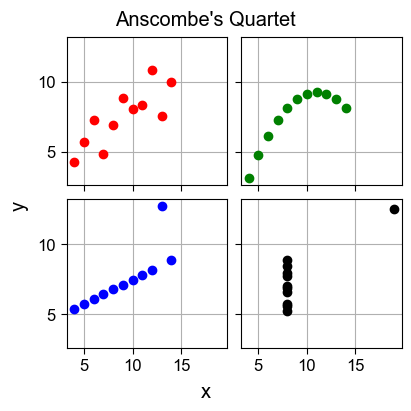

In [27]:
#Create Figure with Subplots
fig = plt.figure(figsize = (4,4), constrained_layout = True);
ax = fig.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True)


#Put Subplots 
ax[0,0].scatter(data["x1"], data["y1"], color = 'red', zorder = 2)
ax[0,0].grid(zorder = 1)


ax[0,1].scatter(data["x2"], data["y2"], color = 'green', zorder = 2)
ax[0,1].grid(zorder = 1)

ax[1,0].scatter(data["x3"], data["y3"], color = 'blue', zorder = 2)
ax[1,0].grid(zorder = 1)

ax[1,1].scatter(data["x4"], data["y4"], color = 'black', zorder = 2)
ax[1,1].grid(zorder = 1)

fig.supxlabel("x");
fig.supylabel("y");
fig.suptitle("Anscombe's Quartet")


plt.show()

## Part [b] - Plotting with plotnine, using faceting (No patchworklib)

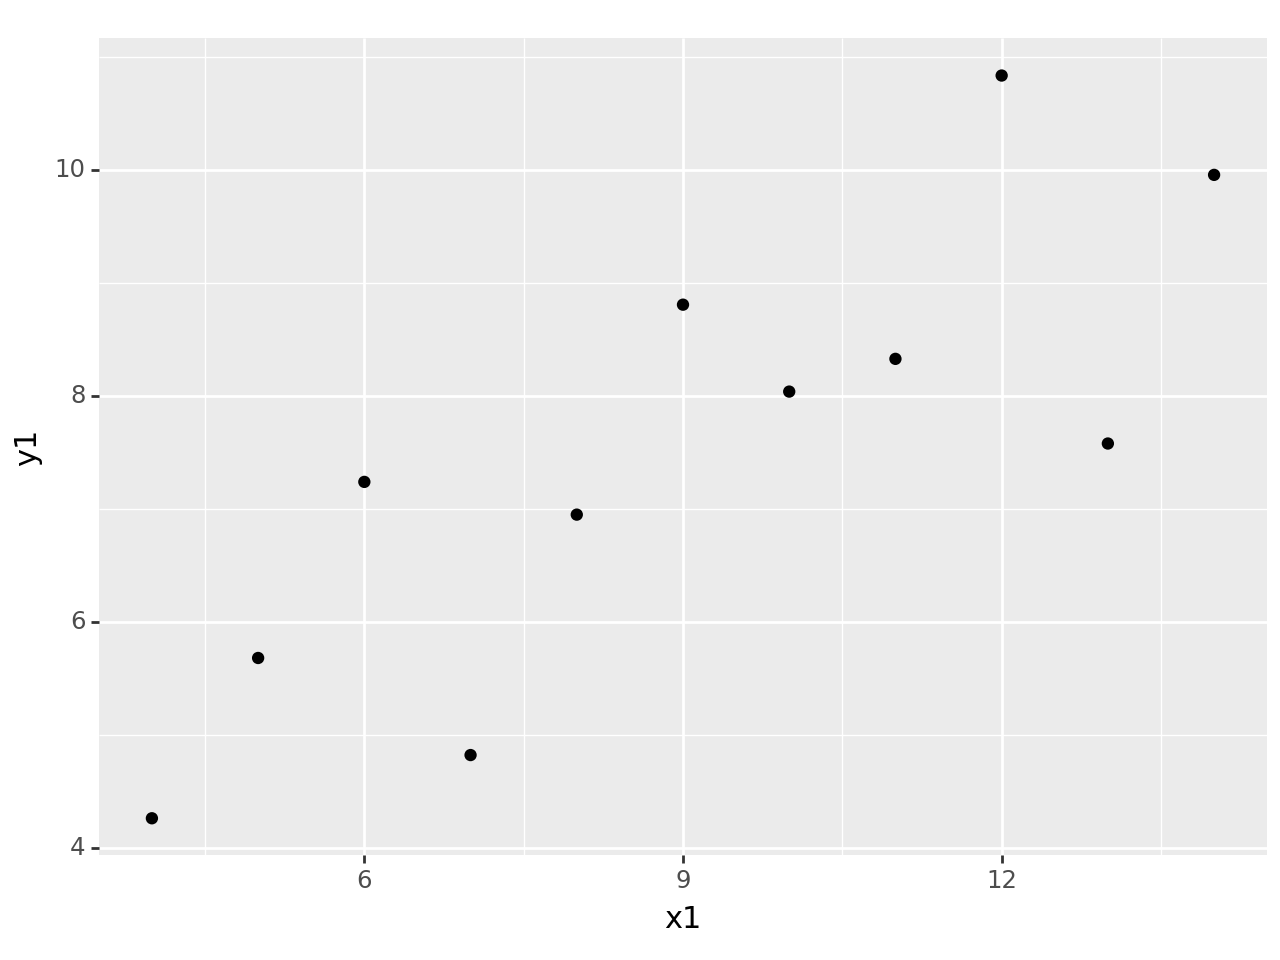

In [40]:
p1 = ggplot(data = data, mapping = aes(x = 'x1', y = 'y1')) + geom_point()
print(p1)